# Clean/Explore Notebook

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import statsmodels.api as sm
from statsmodels.tsa.api import Holt
from datetime import datetime

import wrangle as wr

In [2]:
# Read in the Census File:
census = pd.read_csv('census_data_overview.csv')

In [3]:
census.head()

,periodicity,periodicity_label.value,seasonadj,seasonadj_label.value,geo_level,geo_level_label.value,geography,geography_label.value,ind_level,industry,...,year,quarter,Emp,Sep,SepBeg,SepBegR,sEmp,sSep,sSepBeg,sSepBegR
0,Q,Quarterly data,U,Not seasonally adjusted,S,States,48,Texas,3,111,...,2016,1,20218,4168.0,2552.0,0.124,1,1,1,6
1,Q,Quarterly data,U,Not seasonally adjusted,S,States,48,Texas,3,112,...,2016,1,23871,3397.0,2356.0,0.098,1,1,1,6
2,Q,Quarterly data,U,Not seasonally adjusted,S,States,48,Texas,3,113,...,2016,1,1705,263.0,193.0,0.113,1,1,1,6
3,Q,Quarterly data,U,Not seasonally adjusted,S,States,48,Texas,3,114,...,2016,1,570,93.0,72.0,0.128,1,1,1,6
4,Q,Quarterly data,U,Not seasonally adjusted,S,States,48,Texas,3,115,...,2016,1,11364,4395.0,3235.0,0.304,1,1,1,6


In [4]:
# Dropping unneeded columns:
col_to_drop = ['sEmp', 'sSep', 'sSepBeg', 'sSepBegR', 'periodicity', 'periodicity_label.value',
               'seasonadj', 'seasonadj_label.value', 'geo_level', 'geo_level_label.value', 
               'geography', 'geography_label.value', 'ind_level', 'sex', 'ownercode',
               'ownercode_label.value', 'sex_label.value', 'agegrp_label.value', 'race_label.value',
               'ethnicity_label.value', 'education_label.value', 'firmage_label.value', 'firmsize_label.value',
               'agegrp', 'race', 'ethnicity',  'education', 'firmage', 'firmsize', ]
census_light = census.drop(columns=col_to_drop)
census_light.head()

,industry,industry_label.value,year,quarter,Emp,Sep,SepBeg,SepBegR
0,111,Crop Production,2016,1,20218,4168.0,2552.0,0.124
1,112,Animal Production and Aquaculture,2016,1,23871,3397.0,2356.0,0.098
2,113,Forestry and Logging,2016,1,1705,263.0,193.0,0.113
3,114,"Fishing, Hunting and Trapping",2016,1,570,93.0,72.0,0.128
4,115,Support Activities for Agriculture and Forestry,2016,1,11364,4395.0,3235.0,0.304


In [5]:
# Renaming:
census_light = census_light.rename(columns={'industry_label.value': 'industry_name'})

In [6]:
census_light.head()

,industry,industry_name,year,quarter,Emp,Sep,SepBeg,SepBegR
0,111,Crop Production,2016,1,20218,4168.0,2552.0,0.124
1,112,Animal Production and Aquaculture,2016,1,23871,3397.0,2356.0,0.098
2,113,Forestry and Logging,2016,1,1705,263.0,193.0,0.113
3,114,"Fishing, Hunting and Trapping",2016,1,570,93.0,72.0,0.128
4,115,Support Activities for Agriculture and Forestry,2016,1,11364,4395.0,3235.0,0.304


In [7]:
census_light.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2058 entries, 0 to 2057
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   industry       2058 non-null   int64  
 1   industry_name  2058 non-null   object 
 2   year           2058 non-null   int64  
 3   quarter        2058 non-null   int64  
 4   Emp            2058 non-null   int64  
 5   Sep            1959 non-null   float64
 6   SepBeg         1954 non-null   float64
 7   SepBegR        1954 non-null   float64
dtypes: float64(3), int64(4), object(1)
memory usage: 128.8+ KB


In [8]:
# Creating a column with the numerical representation for the month of the first quarter:
census_light['first_month_qtr'] = census_light.quarter.apply(lambda x: '1' if x==1 
                                                             else '4' if x==2 
                                                             else '7' if x==3
                                                            else '10')

In [9]:
# Combining the year and month
census_light['quarterly'] = census_light.year.astype('string') + '-' + census_light.first_month_qtr.astype('string')

In [10]:
# Formatting datetime
census_light['date'] = pd.to_datetime(census_light.quarterly)

In [11]:
census_light.head()

,industry,industry_name,year,quarter,Emp,Sep,SepBeg,SepBegR,first_month_qtr,quarterly,date
0,111,Crop Production,2016,1,20218,4168.0,2552.0,0.124,1,2016-1,2016-01-01
1,112,Animal Production and Aquaculture,2016,1,23871,3397.0,2356.0,0.098,1,2016-1,2016-01-01
2,113,Forestry and Logging,2016,1,1705,263.0,193.0,0.113,1,2016-1,2016-01-01
3,114,"Fishing, Hunting and Trapping",2016,1,570,93.0,72.0,0.128,1,2016-1,2016-01-01
4,115,Support Activities for Agriculture and Forestry,2016,1,11364,4395.0,3235.0,0.304,1,2016-1,2016-01-01


In [12]:
# Dropping more columns:
col_to_drop = ['year', 'first_month_qtr', 'quarterly']
census_light = census_light.drop(columns=col_to_drop)

In [13]:
census_light[census_light.industry == 111].head()

,industry,industry_name,quarter,Emp,Sep,SepBeg,SepBegR,date
0,111,Crop Production,1,20218,4168.0,2552.0,0.124,2016-01-01
98,111,Crop Production,2,21118,5316.0,3305.0,0.157,2016-04-01
196,111,Crop Production,3,20928,5505.0,2928.0,0.140,2016-07-01
294,111,Crop Production,4,20970,6804.0,3391.0,0.164,2016-10-01
392,111,Crop Production,1,20535,4354.0,2734.0,0.131,2017-01-01


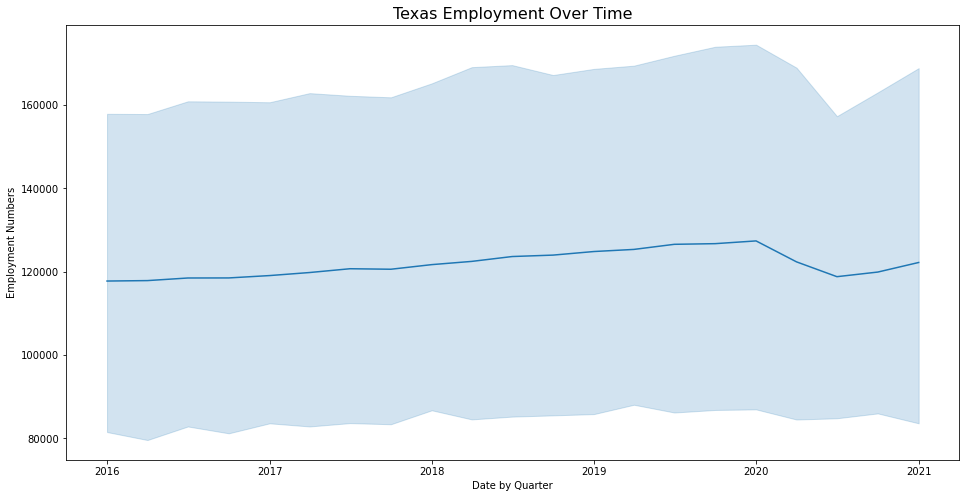

In [14]:
# Time to graph
plt.figure(figsize=(16,8))
sns.lineplot(x="date", y="Emp", 
                palette="ch:r=-.2,d=.3_r",
                data=census_light)
plt.title('Texas Employment Over Time', fontsize=16)
plt.xlabel('Date by Quarter')
plt.ylabel('Employment Numbers')
plt.show()

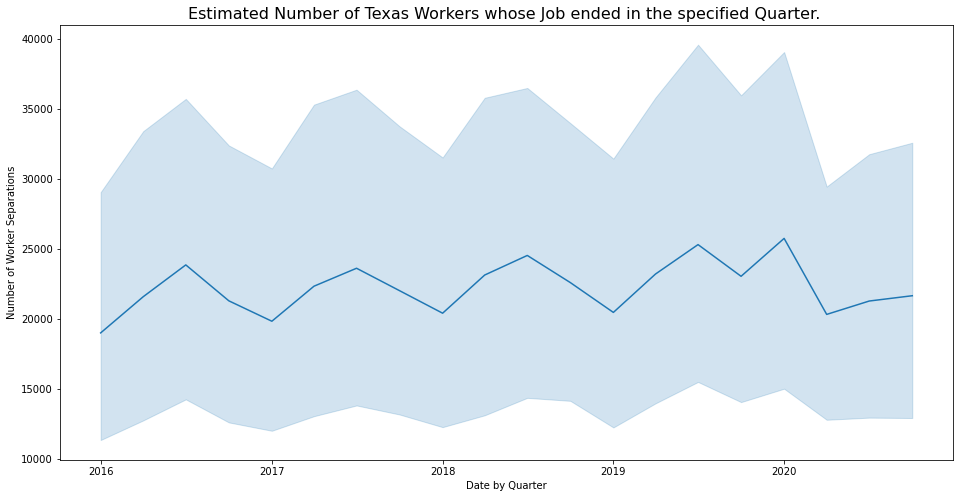

In [15]:
plt.figure(figsize=(16,8))
sns.lineplot(x="date", y="Sep",
                palette="ch:r=-.2,d=.3_r",
                data=census_light)
plt.title('Estimated Number of Texas Workers whose Job ended in the specified Quarter. ', fontsize=16)
plt.xlabel('Date by Quarter')
plt.ylabel('Number of Worker Separations')
plt.show()

In [29]:
# Exploring grouping by industry and mean employment 
pd.DataFrame(census_light.groupby('industry_name').Emp.mean())

,Emp
industry_name,
Accommodation,116864.000000
Administration of Economic Programs,12265.380952
Administration of Environmental Quality Programs,10560.380952
"Administration of Housing Programs, Urban Planning, and Community Development",4887.714286
Administration of Human Resource Programs,32261.904762
...,...
Warehousing and Storage,94766.190476
Waste Management and Remediation Services,40790.285714
Water Transportation,4091.380952


In [17]:
pd.DataFrame(census_light.groupby('industry_name').Sep.mean())

,Sep
industry_name,
Accommodation,31978.30
Administration of Economic Programs,737.60
Administration of Environmental Quality Programs,435.80
"Administration of Housing Programs, Urban Planning, and Community Development",300.05
Administration of Human Resource Programs,1812.65
...,...
Warehousing and Storage,20524.70
Waste Management and Remediation Services,6902.35
Water Transportation,481.50


In [18]:
census_light.Sep.isnull().value_counts()

False    1959
True       99
Name: Sep, dtype: int64

In [19]:
census_light.Emp.isnull().value_counts()

False    2058
Name: Emp, dtype: int64

In [21]:
census_light.head()

,industry,industry_name,quarter,Emp,Sep,SepBeg,SepBegR,date
0,111,Crop Production,1,20218,4168.0,2552.0,0.124,2016-01-01
1,112,Animal Production and Aquaculture,1,23871,3397.0,2356.0,0.098,2016-01-01
2,113,Forestry and Logging,1,1705,263.0,193.0,0.113,2016-01-01
3,114,"Fishing, Hunting and Trapping",1,570,93.0,72.0,0.128,2016-01-01
4,115,Support Activities for Agriculture and Forestry,1,11364,4395.0,3235.0,0.304,2016-01-01


In [24]:
census_light[(census_light.date == '2020-04-01') | (census_light.date == '2020-07-01')]

,industry,industry_name,quarter,Emp,Sep,SepBeg,SepBegR,date
1666,111,Crop Production,2,19256,4380.0,2912.0,0.153,2020-04-01
1667,112,Animal Production and Aquaculture,2,26834,3521.0,2441.0,0.090,2020-04-01
1668,113,Forestry and Logging,2,1584,267.0,169.0,0.105,2020-04-01
1669,114,"Fishing, Hunting and Trapping",2,551,61.0,38.0,0.068,2020-04-01
1670,115,Support Activities for Agriculture and Forestry,2,9773,3489.0,1685.0,0.170,2020-04-01
...,...,...,...,...,...,...,...,...
1857,923,Administration of Human Resource Programs,3,33165,96.0,0.0,0.000,2020-07-01
1858,924,Administration of Environmental Quality Programs,3,10723,82.0,0.0,0.000,2020-07-01
1859,925,"Administration of Housing Programs, Urban Plan...",3,4910,309.0,247.0,0.050,2020-07-01
1860,926,Administration of Economic Programs,3,12621,1147.0,984.0,0.080,2020-07-01


In [30]:
# Top 10 Job loss by industry for the second quarter of 2020:
q2_jobloss = census_light[(census_light.date == '2020-04-01')].sort_values('Sep', ascending=False).head(10)
q2_jobloss

,industry,industry_name,quarter,Emp,Sep,SepBeg,SepBegR,date
1752,722,Food Services and Drinking Places,2,933518,281848.0,202677.0,0.220,2020-04-01
1741,561,Administrative and Support Services,2,735737,272692.0,161824.0,0.222,2020-04-01
1743,611,Educational Services,2,1228700,126608.0,114293.0,0.096,2020-04-01
1739,541,"Professional, Scientific, and Technical Services",2,851335,105549.0,85937.0,0.102,2020-04-01
1744,621,Ambulatory Health Care Services,2,757051,101788.0,80030.0,0.106,2020-04-01
1677,238,Specialty Trade Contractors,2,422701,78666.0,58253.0,0.139,2020-04-01
1711,452,General Merchandise Stores,2,278835,55758.0,31373.0,0.110,2020-04-01
1673,213,Support Activities for Mining,2,137409,48171.0,43887.0,0.370,2020-04-01
1746,623,Nursing and Residential Care Facilities,2,202448,47618.0,33655.0,0.169,2020-04-01
1676,237,Heavy and Civil Engineering Construction,2,211164,45306.0,35231.0,0.171,2020-04-01


In [50]:
# Top 10 Job loss by industry for the third quarter of 2020:
q3_jobloss = census_light[(census_light.date == '2020-07-01')].sort_values('Sep', ascending=False).head(10)
q3_jobloss

,industry,industry_name,quarter,Emp,Sep,SepBeg,SepBegR,date
1850,722,Food Services and Drinking Places,3,909632,325072.0,210222.0,0.228,2020-07-01
1839,561,Administrative and Support Services,3,718805,321194.0,158738.0,0.215,2020-07-01
1841,611,Educational Services,3,1141190,131971.0,109424.0,0.095,2020-07-01
1842,621,Ambulatory Health Care Services,3,749271,107268.0,78798.0,0.104,2020-07-01
1837,541,"Professional, Scientific, and Technical Services",3,836229,104449.0,78371.0,0.093,2020-07-01
1775,238,Specialty Trade Contractors,3,415014,81055.0,58352.0,0.141,2020-07-01
1809,452,General Merchandise Stores,3,291653,57824.0,38832.0,0.132,2020-07-01
1804,445,Food and Beverage Stores,3,248841,46608.0,33736.0,0.135,2020-07-01
1845,624,Social Assistance,3,239831,46238.0,34531.0,0.145,2020-07-01
1844,623,Nursing and Residential Care Facilities,3,195422,45982.0,31949.0,0.164,2020-07-01


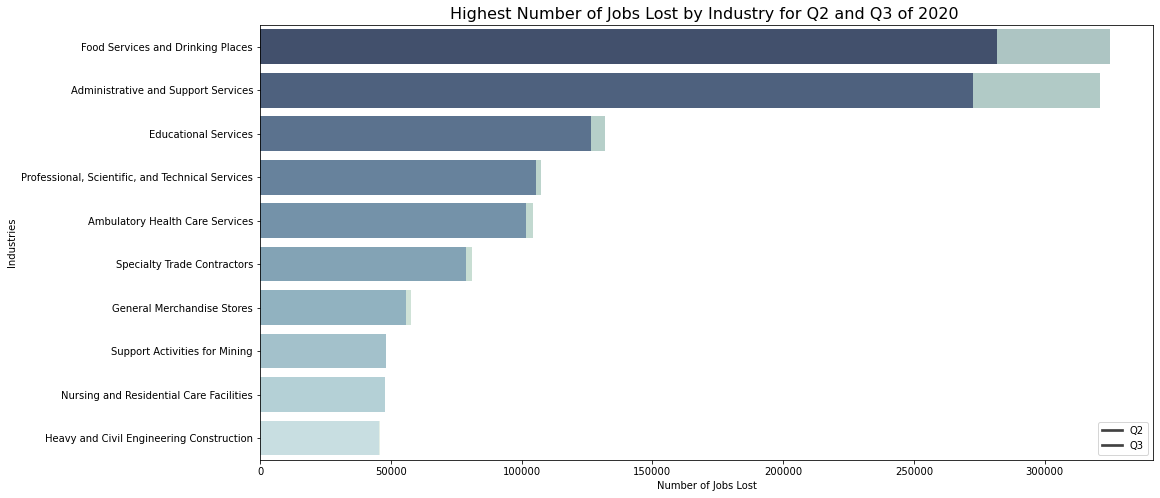

In [49]:
plt.figure(figsize=(16,8))
sns.barplot(x="Sep", y="industry_name",
                palette="ch:r=-.4,d=.5_r",
                data=q3_jobloss, alpha=.5)
sns.barplot(x="Sep", y="industry_name",
                palette="ch:r=-.2,d=.3_r",
                data=q2_jobloss)
plt.title('Highest Number of Jobs Lost by Industry for Q2 and Q3 of 2020 ', fontsize=16)
plt.xlabel('Number of Jobs Lost')
plt.ylabel('Industries')
plt.legend(['Q2', 'Q3'])
plt.show()

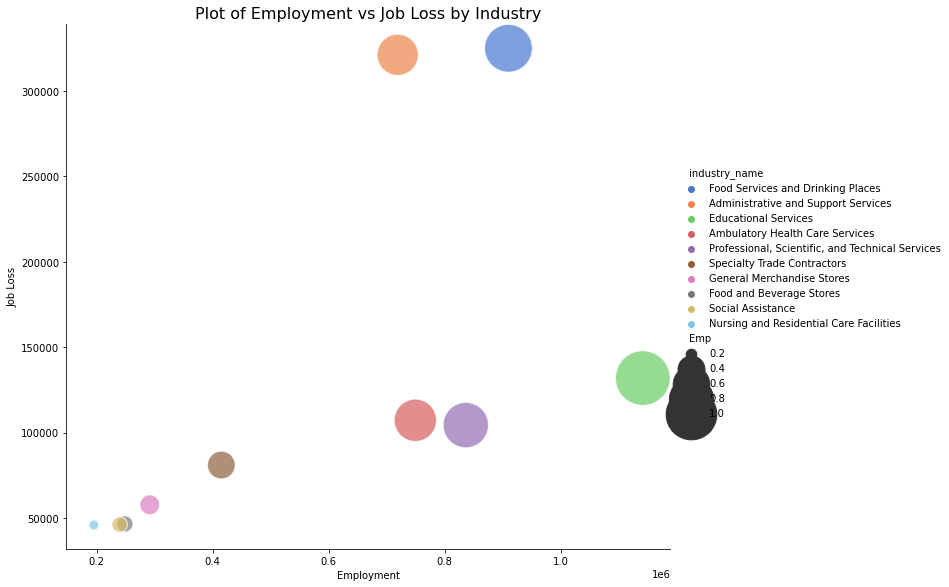

In [140]:
# Plot of Employment vs Job Loss by Industry
sns.relplot(
    data=q3_jobloss,
    x="Emp", y="Sep",
    hue="industry_name", size="Emp",
    palette="muted", alpha=.7,
    sizes=(100, 3000),
    height=8, aspect=1.2
)
plt.title('Plot of Employment vs Job Loss by Industry', fontsize=16)
plt.xlabel('Employment')
plt.ylabel('Job Loss')
plt.show()

In [126]:
industries_highest_job_loss = [561, 611]
census_lighter = census_light[census_light.industry == 722]

for industry in industries_highest_job_loss:
    industry_loss = census_light[census_light.industry == industry]
    census_lighter = pd.concat([census_lighter, industry_loss], ignore_index=True)
    
census_lighter

,industry,industry_name,quarter,Emp,Sep,SepBeg,SepBegR,date
0,722,Food Services and Drinking Places,1,957888,314799.0,200864.0,0.207,2016-01-01
1,722,Food Services and Drinking Places,2,979570,362941.0,223719.0,0.226,2016-04-01
2,722,Food Services and Drinking Places,3,1003537,394008.0,251699.0,0.252,2016-07-01
3,722,Food Services and Drinking Places,4,991272,334271.0,212312.0,0.215,2016-10-01
4,722,Food Services and Drinking Places,1,984492,323132.0,207391.0,0.209,2017-01-01
...,...,...,...,...,...,...,...,...
58,611,Educational Services,1,1267905,126016.0,100931.0,0.081,2020-01-01
59,611,Educational Services,2,1228700,126608.0,114293.0,0.096,2020-04-01
60,611,Educational Services,3,1141190,131971.0,109424.0,0.095,2020-07-01
61,611,Educational Services,4,1151218,61173.0,38872.0,0.033,2020-10-01


<AxesSubplot:xlabel='date', ylabel='Sep'>

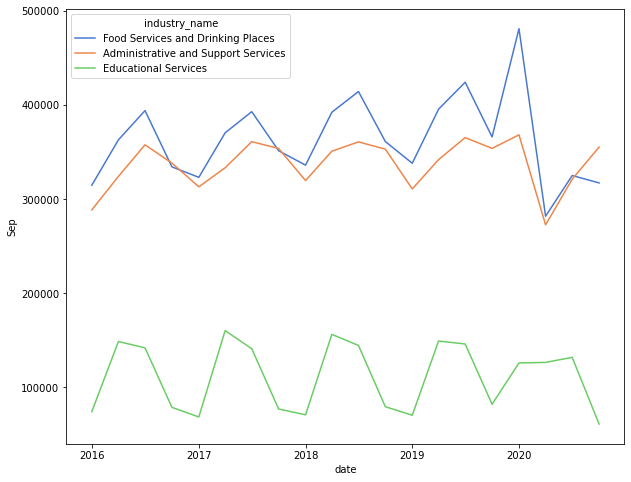

In [136]:
plt.figure(figsize=(10,8))
sns.lineplot(x="date", y="Sep",
            hue="industry_name", palette="muted",
            data=census_lighter)

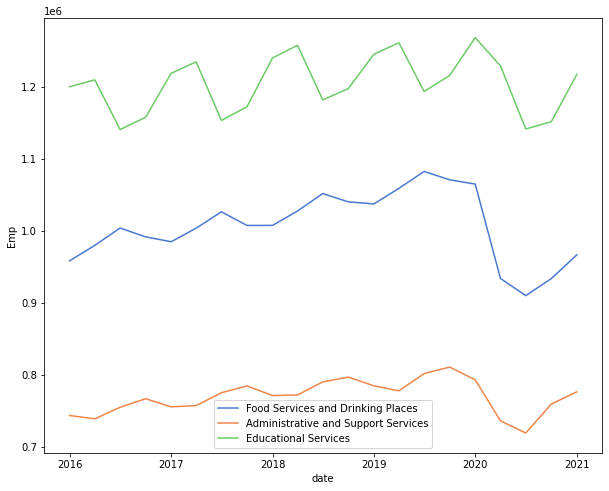

In [151]:
plt.figure(figsize=(10,8))
sns.lineplot(x="date", y="Emp",
            hue="industry_name", palette="muted",
            data=census_lighter)
plt.legend()
plt.show()

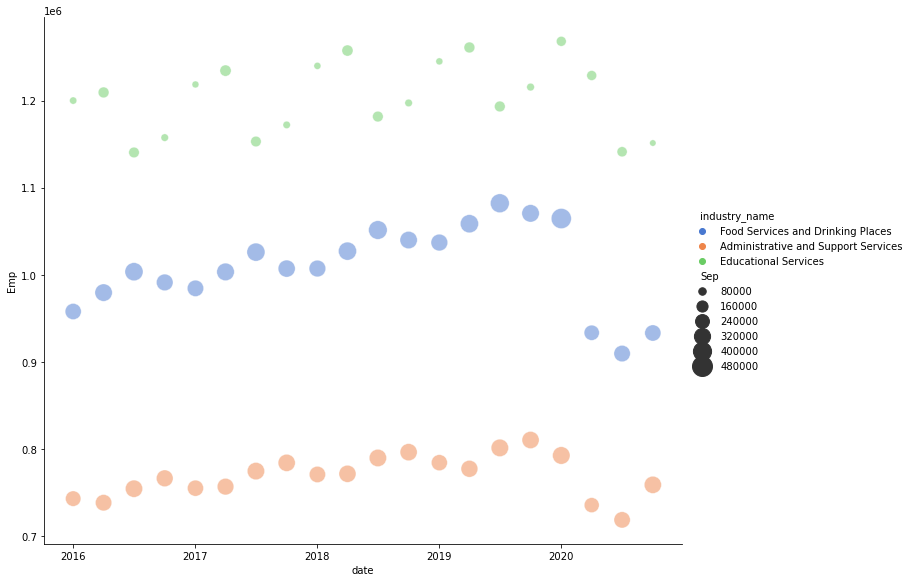

In [145]:
sns.relplot(x="date", y="Emp", hue="industry_name", size="Sep",
            sizes=(40, 400), alpha=.5, palette="muted",
            data=census_lighter,
            height=8, aspect=1.2)
plt.show()